### Se pide, usando regresión lineal:

Dibujar con una línea la relación que hay entre la altura y la edad de los alumnos de la clase: 

- ¿Es una buena técnica para este tipo de problemas? ¿Por qué? 
- ¿Qué error se comete? Calcula los errores que está cometiendo tu modelo uno a uno (lo tienes que calcular tú con python). Aparte, usa el MSE y el RMSE. ¿Alguno es mejor para este problema?
- Representa la matriz de correlación, ¿los datos están correlacionados?
- ¿Qué ocurre si la altura se multiplica por dos? ¿Y si se multiplica solo la edad? 

In [2]:
lista_alumnos = [["Jalex", 6, 47, 1.80], ["Tomas", 5, 31, 1.80], ["David", 6, 39, 1.81], ["Natalio", 2, 29, 1.73], ["Monica", 3, 47, 1.73], ["Roxanna", 4,24,1.75], ["Filipa", 5,34,1.64], ["Elsa", 4, 36, 1.89], ["Cristina", 3, 46, 1.70], ["Alba", 3, 29, 1.68], ["Valeria",1, 40, 1.60], ["Jose Luis", 4, 47, 1.69], ["Rochi", 2, 38, 1.60], ["Jose Maria", 5, 51, 1.75]]

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics

In [11]:
height = []

for elem in lista_alumnos:
    height.append(elem[3])

height = np.array(height)
height = height.reshape(-1,1)
height

array([[1.8 ],
       [1.8 ],
       [1.81],
       [1.73],
       [1.73],
       [1.75],
       [1.64],
       [1.89],
       [1.7 ],
       [1.68],
       [1.6 ],
       [1.69],
       [1.6 ],
       [1.75]])

In [12]:
height.shape

(14, 1)

In [13]:
age = []

for elem in lista_alumnos:
    age.append(elem[2])

age = np.array(age)
age = age.reshape(-1,1)
age

array([[47],
       [31],
       [39],
       [29],
       [47],
       [24],
       [34],
       [36],
       [46],
       [29],
       [40],
       [47],
       [38],
       [51]])

In [14]:
age.shape

(14, 1)

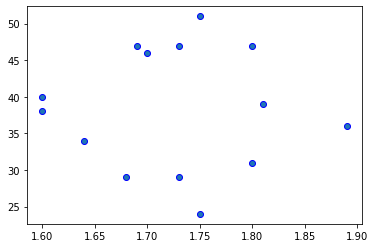

In [15]:
plt.scatter(height, age, edgecolor = 'blue')

In [17]:
train_errors , val_errors = [], []

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    
    for m in range(1, len(X_train)):  # Incremental
        
        x = X_train[:m]
        y = y_train[:m]
        model.fit(x, y)

        y_train_predict = model.predict(x)
        y_val_predict = model.predict(X_val)

        train_errors.append(mean_absolute_error(y, y_train_predict))
        val_errors.append(mean_absolute_error(y_val, y_val_predict))

        if m < 6:
            print("##### ITERACIÓN " + str(m) + " #####")
            print("x", x)
            print("y", y)
            print("y_train_predict", y_train_predict)
            print("-----\nX_val\n", X_val)
            print("y_val_predict", y_val_predict)

    plt.plot(train_errors, "r-+", linewidth=2, label="train")
    plt.plot(val_errors, "b-", linewidth=3, label="val")

##### ITERACIÓN 1 #####
x [[1.6]]
y [[38]]
y_train_predict [[38.]]
-----
X_val
 [[1.68]
 [1.69]
 [1.64]]
y_val_predict [[38.]
 [38.]
 [38.]]
##### ITERACIÓN 2 #####
x [[1.6 ]
 [1.89]]
y [[38]
 [36]]
y_train_predict [[38.]
 [36.]]
-----
X_val
 [[1.68]
 [1.69]
 [1.64]]
y_val_predict [[37.44827586]
 [37.37931034]
 [37.72413793]]
##### ITERACIÓN 3 #####
x [[1.6 ]
 [1.89]
 [1.75]]
y [[38]
 [36]
 [51]]
y_train_predict [[42.51505547]
 [40.83755943]
 [41.6473851 ]]
-----
X_val
 [[1.68]
 [1.69]
 [1.64]]
y_val_predict [[42.05229794]
 [41.99445325]
 [42.2836767 ]]
##### ITERACIÓN 4 #####
x [[1.6 ]
 [1.89]
 [1.75]
 [1.6 ]]
y [[38]
 [36]
 [51]
 [40]]
y_train_predict [[41.36340206]
 [41.06443299]
 [41.20876289]
 [41.36340206]]
-----
X_val
 [[1.68]
 [1.69]
 [1.64]]
y_val_predict [[41.28092784]
 [41.27061856]
 [41.32216495]]
##### ITERACIÓN 5 #####
x [[1.6 ]
 [1.89]
 [1.75]
 [1.6 ]
 [1.81]]
y [[38]
 [36]
 [51]
 [40]
 [39]]
y_train_predict [[41.27129909]
 [40.21993958]
 [40.72749245]
 [41.27129909]
 [4

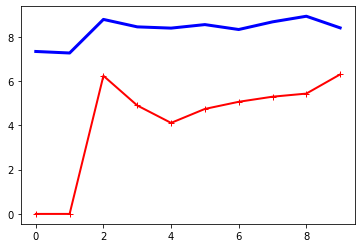

In [18]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
plot_learning_curves(model = lin_reg, X =height, y= age)

In [19]:
# y = a + bX

# b, pendiente
b = lin_reg.coef_ 
b

array([[-11.4667372]])

In [20]:
# a, secante
a = lin_reg.intercept_
a

array([59.88652295])

In [21]:
print("|||||||||||ERRORES||||||||||||")
print("train_errors\n\n", train_errors)
print("val_errors\n\n", val_errors)

|||||||||||ERRORES||||||||||||
train_errors

 [0.0, 0.0, 6.235076597992605, 4.895618556701033, 4.109003021148034, 4.739309145522095, 5.061559049849447, 5.291659757917425, 5.431699346405228, 6.298346779526518]
val_errors

 [7.333333333333333, 7.264367816091955, 8.780507131537242, 8.444158075601377, 8.387512588116815, 8.54667615208284, 8.324746291959405, 8.670314486265406, 8.92357843137255, 8.398580434686771]


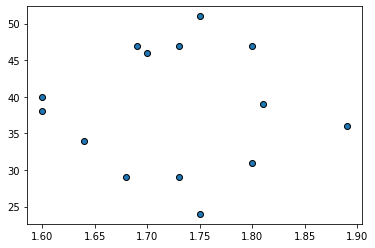

In [23]:
plt.scatter(height,age, edgecolor='black')

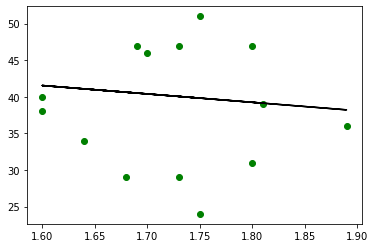

In [29]:
plt.scatter(height, age, color='g')
plt.plot(height, lin_reg.predict(height), color='k')

plt.show()

In [51]:
def mae1(x, y, b, a):
    return a +b*x
   

In [54]:
def mae2(x, y, b, a):
    return (y-a)/b

In [58]:
ycalc = mae1(x=height, y= age, b=b, a=a)
ycalc

array([[39.24639598],
       [39.24639598],
       [39.13172861],
       [40.04906758],
       [40.04906758],
       [39.81973284],
       [41.08107393],
       [38.21438963],
       [40.3930697 ],
       [40.62240444],
       [41.53974342],
       [40.50773707],
       [41.53974342],
       [39.81973284]])

In [59]:
mae2(x=height, y= ycalc, b=b, a=a)

array([[1.8 ],
       [1.8 ],
       [1.81],
       [1.73],
       [1.73],
       [1.75],
       [1.64],
       [1.89],
       [1.7 ],
       [1.68],
       [1.6 ],
       [1.69],
       [1.6 ],
       [1.75]])

In [61]:
p = age - ycalc
maecal = np.mean(abs(p))
maecal

7.087734048784173

In [62]:
mae = mean_absolute_error(age, ycalc)
mae

7.087734048784173

In [66]:
mse = mean_squared_error(age, ycalc)
print(mse)
rmse = np.sqrt(mse)
print(rmse)
r2 = metrics.r2_score(age, ycalc)
r2


68.02940030915558
8.247993714180168


-0.0518903802930335

In [82]:
import pandas as pd

df = pd.DataFrame(data= height)
df[1]=age
df

,0,1
0,1.80,47
1,1.80,31
2,1.81,39
3,1.73,29
4,1.73,47
5,1.75,24
6,1.64,34
7,1.89,36
8,1.70,46
9,1.68,29


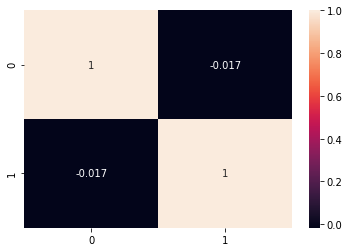

In [84]:
import seaborn as sns
a = df.corr()

sns.heatmap(a, annot = True)

plt.show()